# Importance Sampling

In [15]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax
import jax.numpy as jnp
import jax.random as jr
import pylab as plt
from jax.scipy.stats import norm

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.gaussian import IsotropicGauss
from mcjax.proba.exponential import Exponential
from mcjax.IS.IS import IS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# initialize jax RNG
key = jr.key(0)

In [17]:
# Sample one-dimension standard gaussian distribution
dim = 1
mu = np.zeros(dim)
sigma = 1.
log_var = jnp.log(sigma**2)
target_dist = IsotropicGauss(mu=mu, log_var=log_var)
theta = np.array([4])
gamma = 1.
proposal_dist = Exponential(theta=theta,gamma=gamma)

In [35]:
# Estimate P(X > 4) where X ~ Normal(0,1)
def test(x_batch):
    return jnp.all(x_batch > 4, axis=-1)

In [36]:
key, key_ = jr.split(key)
importancesampling =IS(logtarget=target_dist)
n_samples = 100000
dist_output = importancesampling.run(key=key,n_samples=n_samples, proposal=proposal_dist,test=test)
print("Est result: ", dist_output["estimator"])
print("True result: ", 1-norm.cdf(4))

Est result:  3.1635227e-05
True result:  3.1650066e-05


Text(0.5, 1.0, 'Simulation of P(N(0,1)>4) by Importance Sampling')

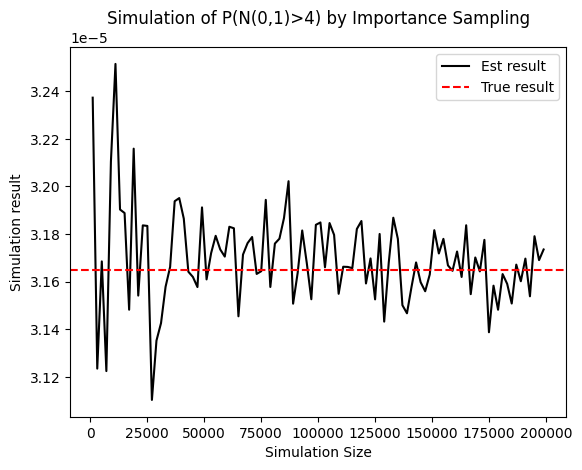

In [37]:
Sim_size = jnp.arange(1000, 200001, 2000)
dist_output_arr = [importancesampling.run(key=key,n_samples=n_samples, proposal=proposal_dist,test=test)\
                for n_samples in Sim_size]
estimator_arr = [i["estimator"] for i in dist_output_arr]
plt.plot(Sim_size,estimator_arr,color = 'black',label='Est result')
plt.axhline(y=1-norm.cdf(4), color='r', linestyle='--', label="True result")
plt.legend()
plt.xlabel("Simulation Size")
plt.ylabel("Simulation result")
plt.title("Simulation of P(N(0,1)>4) by Importance Sampling")

Text(0.5, 1.0, 'Simulation of P(N(0,1)>4) by Importance Sampling')

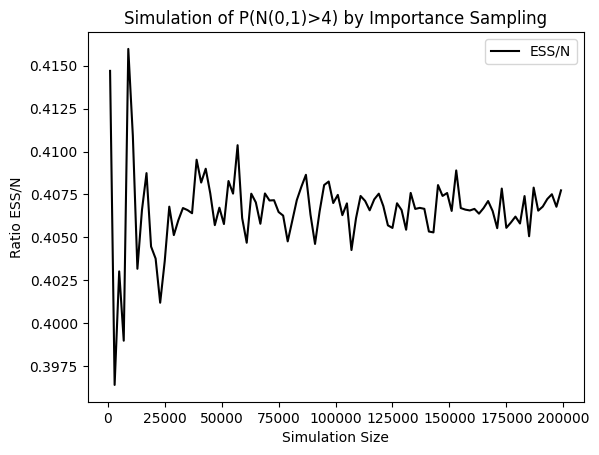

In [34]:
ess_arr = [i["ess"] for i in dist_output_arr]
essratio_arr = [ess_arr[i]/Sim_size[i] for i in range(len(Sim_size))]
plt.plot(Sim_size,essratio_arr,color = 'black',label='ESS/N')
plt.legend()
plt.xlabel("Simulation Size")
plt.ylabel("Ratio ESS/N")
plt.title("Simulation of P(N(0,1)>4) by Importance Sampling")

In [58]:
# Sample 1 to 8 dimension standard gaussian distribution 

# Here we estimate P(X > 2) where X ~ Normal(0,1)
def test(x_batch):
    return jnp.all(x_batch > 2, axis=-1)

dim_arr = jnp.arange(1,21,1)
estimator_ratio_arr = []
ess_arr = []
for dim in dim_arr:
    mu = np.zeros(dim)
    sigma = 1.
    log_var = jnp.log(sigma**2)
    target_dist = IsotropicGauss(mu=mu, log_var=log_var)
    theta = np.full(dim, 2.)
    gamma = 1.
    proposal_dist = Exponential(theta=theta,gamma=gamma)
    key, key_ = jr.split(key)
    importancesampling =IS(logtarget=target_dist)
    
    # Fix number of samples = 100000
    n_samples = 100000
    dist_output = importancesampling.run(key=key,n_samples=n_samples, proposal=proposal_dist,test=test)
    true_result = (1-norm.cdf(2))**dim
    estimator_ratio_arr.append(dist_output["estimator"]/true_result)
    ess_arr.append(dist_output["ess"])


Text(0.5, 1.0, 'Simulation of P(N(0,1)>2) by Importance Sampling \n Bias and Dimension')

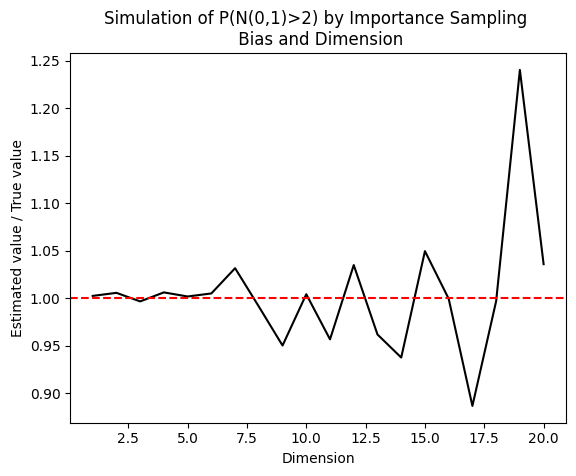

In [64]:
plt.plot(dim_arr,estimator_ratio_arr,color = 'black')
plt.axhline(y=1, color='r', linestyle='--', label="True result")
plt.xlabel("Dimension")
plt.ylabel("Estimated value / True value")
plt.title("Simulation of P(N(0,1)>2) by Importance Sampling \n Bias and Dimension")

Text(0.5, 1.0, 'Simulation of P(N(0,1)>2) by Importance Sampling \n ESS and Dimension')

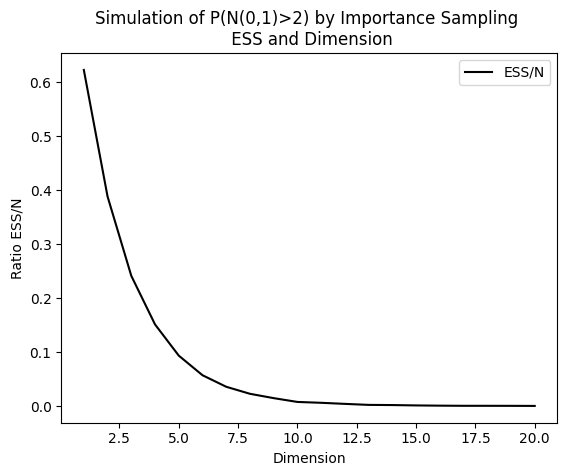

In [68]:
essratio_arr = [ess_arr[i]/n_samples for i in range(len(ess_arr))]
plt.plot(dim_arr,essratio_arr,color = 'black',label='ESS/N')
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Ratio ESS/N")
plt.title("Simulation of P(N(0,1)>2) by Importance Sampling \n ESS and Dimension")